## Ejemplo utilizando splines:

In [14]:
import pandas as pd
import os
import numpy as np
from scipy.interpolate import interp1d
import math
import matplotlib.pyplot as plt
import pprint

In [15]:
os.getcwd()

'/datos/Practica_final_equipos'

In [16]:
data_2 = pd.read_csv("Datos_csv.csv")

In [17]:
data_2.head()

,muestras,anio,fecha,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
0,1,2017,01-sep,0,1,6872.013385,6976.172363,1
1,2,2017,01-sep,1,2,6660.573651,6709.388672,1
2,3,2017,01-sep,2,3,6504.232961,6568.017090,1
3,4,2017,01-sep,3,4,6435.836442,6502.294434,1
4,5,2017,01-sep,4,5,6437.741557,6384.402344,1


In [18]:
data_2.describe()

,muestras,anio,hora_inicio,hora_fin,dema_int,dem_inst,aniomovil
count,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000,25152.000000
mean,4209.362595,2018.605797,11.500000,12.500000,7745.438583,7734.933778,1.955153
std,2448.412619,0.919625,6.922324,6.922324,974.363777,977.956108,0.806060
min,1.000000,2017.000000,0.000000,1.000000,4288.339301,4230.882324,1.000000
25%,2096.750000,2018.000000,5.750000,6.750000,7011.455212,6998.106567,1.000000
50%,4192.500000,2019.000000,11.500000,12.500000,7807.317117,7794.049072,2.000000
75%,6288.250000,2019.000000,17.250000,18.250000,8484.490007,8478.522950,3.000000
max,8760.000000,2020.000000,23.000000,24.000000,10567.494660,11267.710940,3.000000


In [19]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25152 entries, 0 to 25151
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   muestras     25152 non-null  int64  
 1   anio         25152 non-null  int64  
 2   fecha        25152 non-null  object 
 3   hora_inicio  25152 non-null  int64  
 4   hora_fin     25152 non-null  int64  
 5   dema_int     25152 non-null  float64
 6   dem_inst     25152 non-null  float64
 7   aniomovil    25152 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.5+ MB


In [20]:
data_2.dema_int

0        6872.013385
1        6660.573651
2        6504.232961
3        6435.836442
4        6437.741557
            ...     
25147    8223.639187
25148    8241.447436
25149    8604.842271
25150    8519.651856
25151    8279.839812
Name: dema_int, Length: 25152, dtype: float64

### Trabajando con polyfit n = 1,500:

In [21]:
#Creando arreglo de las filas a remover del dataframe:
del_rows_1500 = range(1500,25152)
print(del_rows_1500)

range(1500, 25152)


In [22]:
#Trabajando con 1500 valores:
data_2_1500 = data_2.drop(data_2.index[del_rows_1500], axis = 0)

In [23]:
data_2_1500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   muestras     1500 non-null   int64  
 1   anio         1500 non-null   int64  
 2   fecha        1500 non-null   object 
 3   hora_inicio  1500 non-null   int64  
 4   hora_fin     1500 non-null   int64  
 5   dema_int     1500 non-null   float64
 6   dem_inst     1500 non-null   float64
 7   aniomovil    1500 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 105.5+ KB


In [24]:
data_2_1500.dema_int

0       6872.013385
1       6660.573651
2       6504.232961
3       6435.836442
4       6437.741557
           ...     
1495    6902.985314
1496    7093.632639
1497    7593.186041
1498    7922.896426
1499    8057.841838
Name: dema_int, Length: 1500, dtype: float64

In [25]:
# Interpolación con polyfit n = 1500 para el grado del polinimio
mpoints_1500 = 1500
d_1500 = 1499
x_1500 = np.linspace(0, mpoints_1500, mpoints_1500)

In [26]:
coeff_1500 = np.polyfit(x_1500, data_2_1500.dema_int, d_1500)

/home/miuser/.local/lib/python3.6/site-packages/numpy/lib/polynomial.py:629: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/miuser/.local/lib/python3.6/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/home/miuser/.local/lib/python3.6/site-packages/numpy/lib/polynomial.py:630: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


ValueError: On entry to DLASCL parameter number 4 had an illegal value

### Trabajando con polyfit n = 100:

In [27]:
#Creando arreglo de las filas a remover del dataframe:
del_rows_100 = range(100,25152)
print(del_rows_100)

range(100, 25152)


In [28]:
#Trabajando con 100 valores:
data_2_100 = data_2.drop(data_2.index[del_rows_100], axis = 0)

In [29]:
data_2_100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   muestras     100 non-null    int64  
 1   anio         100 non-null    int64  
 2   fecha        100 non-null    object 
 3   hora_inicio  100 non-null    int64  
 4   hora_fin     100 non-null    int64  
 5   dema_int     100 non-null    float64
 6   dem_inst     100 non-null    float64
 7   aniomovil    100 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 7.0+ KB


In [30]:
data_2_100.dema_int

0     6872.013385
1     6660.573651
2     6504.232961
3     6435.836442
4     6437.741557
         ...     
95    7324.198272
96    6862.726635
97    6695.890878
98    6505.227678
99    6483.619702
Name: dema_int, Length: 100, dtype: float64

In [104]:
# Interpolación con polyfit n = 100 para el grado del polinimio
mpoints_100 = 100
d_100 = 99
x_100 = np.linspace(0, mpoints_100, mpoints_100)

In [105]:
coeff_100 = np.polyfit(x_100, data_2_100.dema_int, d_100)

/home/miuser/.local/lib/python3.6/site-packages/numpy/lib/polynomial.py:629: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/miuser/.local/lib/python3.6/site-packages/numpy/core/_methods.py:38: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


### Trabajando con splines n = 100:

In [106]:
#Haciendo splines cúbicos, n = 100:
spline_100 = interp1d(x_100, data_2_100.dema_int, kind = 'cubic', fill_value='extrapolate')

In [107]:
y_eval_spline_100 = spline_100(x_100)
print('x_100.shape para verificar:', x_100.shape[0])
print('y_eval_spline_100.shape para verificar:', y_eval_spline_100.shape[0])

x_100.shape para verificar: 100
y_eval_spline_100.shape para verificar: 100


Gráfica con splines n = 100: 



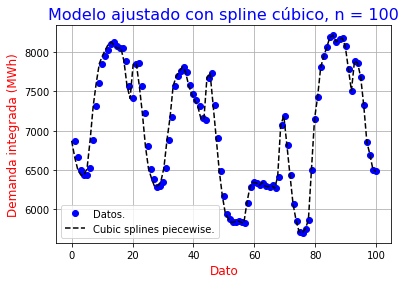

In [108]:
print("Gráfica con splines n = 100: \n")
plt.plot(data_2_100.muestras, data_2_100.dema_int, 'bo', x_100, y_eval_spline_100, 'k--')
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico, n = 100", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Trabajando con splines n = 1,500:

In [36]:
#Haciendo splines cúbicos, n = 1,500:
spline_1500 = interp1d(x_1500, data_2_1500.dema_int, kind = 'cubic', fill_value='extrapolate')

In [37]:
y_eval_spline_1500 = spline_1500(x_1500)
print('x_1500.shape para verificar:', x_1500.shape[0])
print('y_eval_spline_1500.shape para verificar:', y_eval_spline_1500.shape[0])

x_1500.shape para verificar: 1500
y_eval_spline_1500.shape para verificar: 1500


Gráfica con splines n = 1,500: 



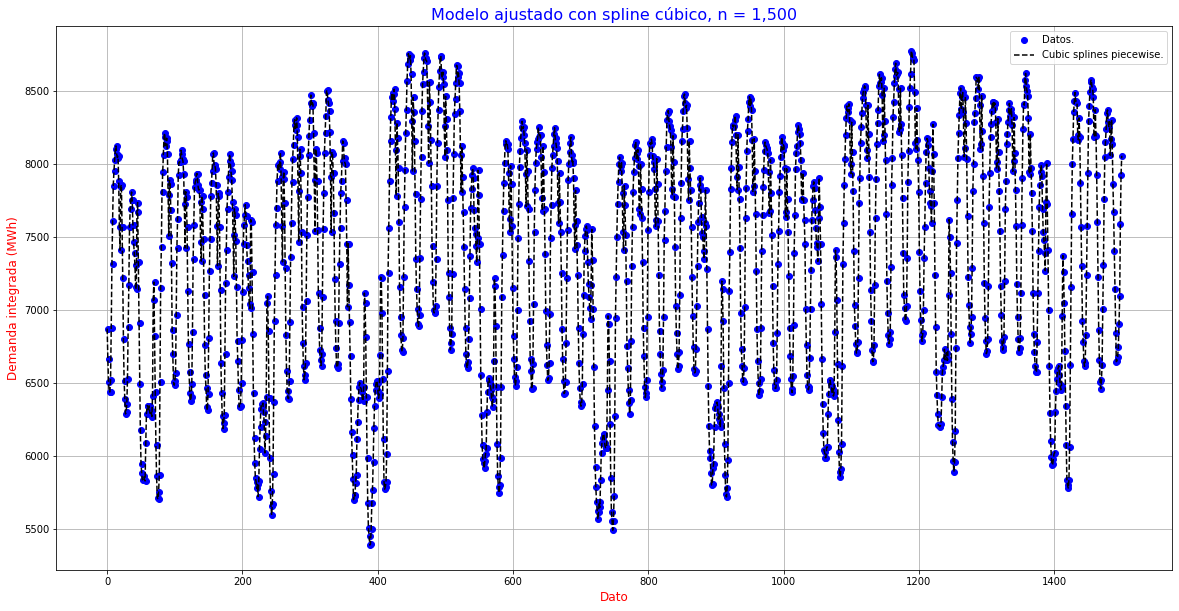

In [38]:
print("Gráfica con splines n = 1,500: \n")
fig = plt.figure(figsize=(20,10))
plt.plot(data_2_1500.muestras, data_2_1500.dema_int, 'bo', x_1500, y_eval_spline_1500, 'k--')
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico, n = 1,500", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Trabajando con splines 100% de los datos:

In [39]:
mpoints_100p = 25152
x_100p = np.linspace(0, mpoints_100p, mpoints_100p)

In [40]:
#Haciendo splines cúbicos, 100% datos:
spline_100p = interp1d(x_100p, data_2.dema_int, kind = 'cubic', fill_value='extrapolate')

In [41]:
y_eval_spline_100p = spline_100p(x_100p)
print('x_100%.shape para verificar:', x_100p.shape[0])
print('y_eval_spline_100%.shape para verificar:', y_eval_spline_100p.shape[0])

x_100%.shape para verificar: 25152
y_eval_spline_100%.shape para verificar: 25152


Gráfica con splines 100% datos: 



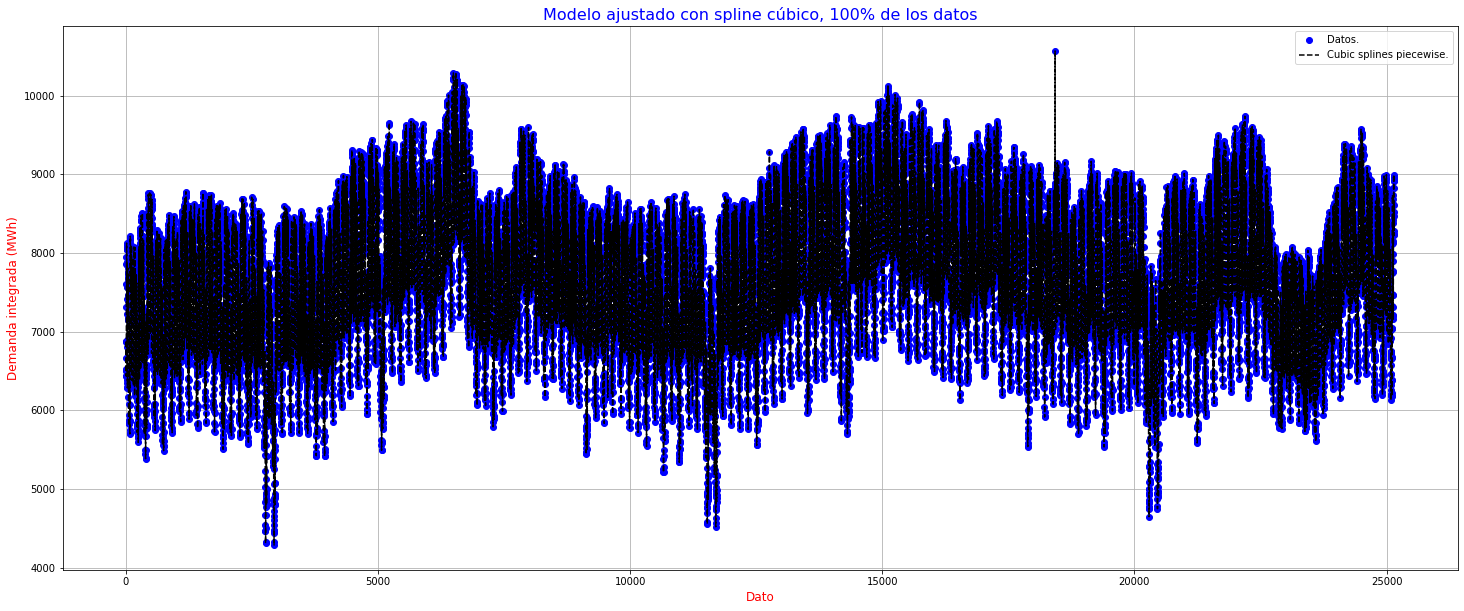

In [42]:
print("Gráfica con splines 100% datos: \n")
fig = plt.figure(figsize=(25,10))
plt.plot(data_2.index, data_2.dema_int, "bo", x_100p, y_eval_spline_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico, 100% de los datos", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Trabajando con splines 80% de los datos:

In [43]:
#Creando arreglo para eliminar el 20% final de los datos
del_rows_80p = range(20121,25152)
print(del_rows_80p)

range(20121, 25152)


In [44]:
#Trabajando con el 80% de los valores valores:
data_2_80p = data_2.drop(data_2.index[del_rows_80p], axis = 0)

In [45]:
data_2_80p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20121 entries, 0 to 20120
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   muestras     20121 non-null  int64  
 1   anio         20121 non-null  int64  
 2   fecha        20121 non-null  object 
 3   hora_inicio  20121 non-null  int64  
 4   hora_fin     20121 non-null  int64  
 5   dema_int     20121 non-null  float64
 6   dem_inst     20121 non-null  float64
 7   aniomovil    20121 non-null  int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.4+ MB


In [46]:
data_2_80p.dema_int

0        6872.013385
1        6660.573651
2        6504.232961
3        6435.836442
4        6437.741557
            ...     
20116    7037.538071
20117    7067.574023
20118    7195.404202
20119    7551.717845
20120    7967.850435
Name: dema_int, Length: 20121, dtype: float64

In [47]:
mpoints_80p = 20121
x_80p = np.linspace(0, mpoints_80p, mpoints_80p)

In [48]:
#Haciendo splines cúbicos, 80% datos:
spline_80p = interp1d(x_80p, data_2_80p.dema_int, kind = 'cubic', fill_value='extrapolate')

In [49]:
y_eval_spline_80p = spline_80p(x_80p)
print('x_80%.shape para verificar:', x_80p.shape[0])
print('y_eval_spline_80%.shape para verificar:', y_eval_spline_80p.shape[0])

x_80%.shape para verificar: 20121
y_eval_spline_80%.shape para verificar: 20121


Gráfica con splines 80% datos: 



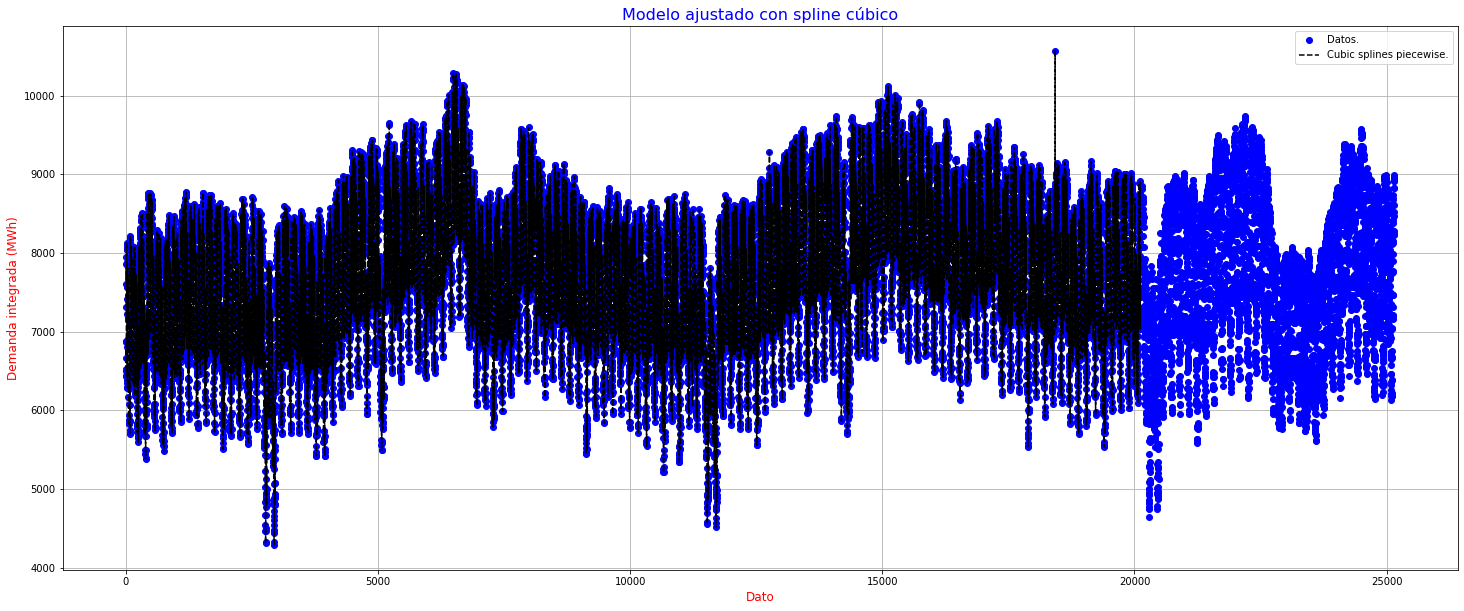

In [50]:
print("Gráfica con splines 80% datos: \n")
fig = plt.figure(figsize=(25,10))
plt.plot(data_2.index, data_2.dema_int, "bo", x_80p, y_eval_spline_80p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Haciendo zoom al final:

Gráfica con splines 80% datos: 



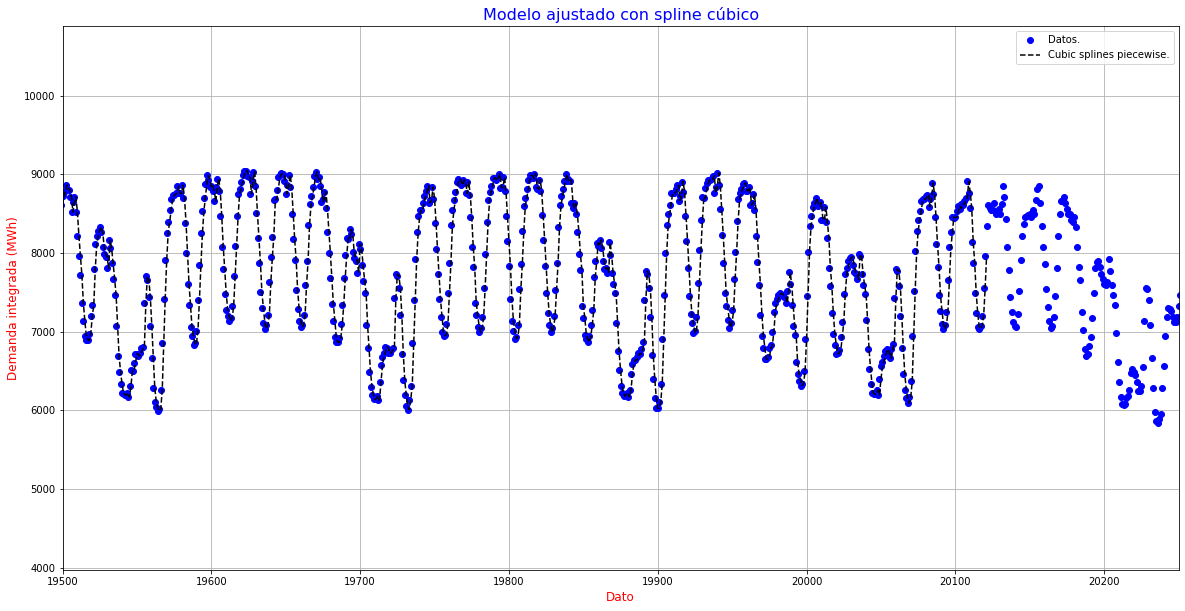

In [51]:
print("Gráfica con splines 80% datos: \n")
fig = plt.figure(figsize=(20,10))
plt.xlim(19500, 20250)
#plt.ylim(-5, 5)
plt.plot(data_2.index, data_2.dema_int, "bo", x_80p, y_eval_spline_80p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Extrapolando con splines al 100% de los datos:

In [52]:
y_eval_spline_80_100p = spline_80p(data_2.index)
print('x_80%.shape para verificar:', data_2.index)
print('y_eval_spline_80%.shape para verificar:', y_eval_spline_80_100p.shape[0])

x_80%.shape para verificar: RangeIndex(start=0, stop=25152, step=1)
y_eval_spline_80%.shape para verificar: 25152


Extrapolando con splines al 100% de los datos: 



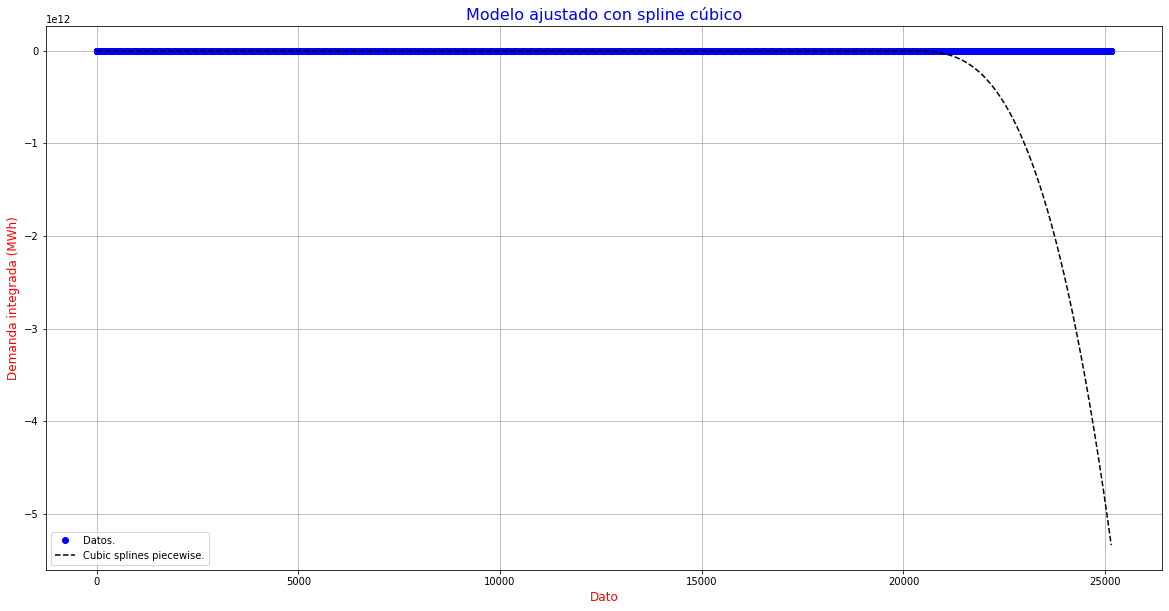

In [53]:
print("Extrapolando con splines al 100% de los datos: \n")
fig = plt.figure(figsize=(20,10))
plt.plot(data_2.index, data_2.dema_int, "bo", data_2.index, y_eval_spline_80_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Haciendo zoom al final:

Extrapolando con splines al 100% de los datos: 



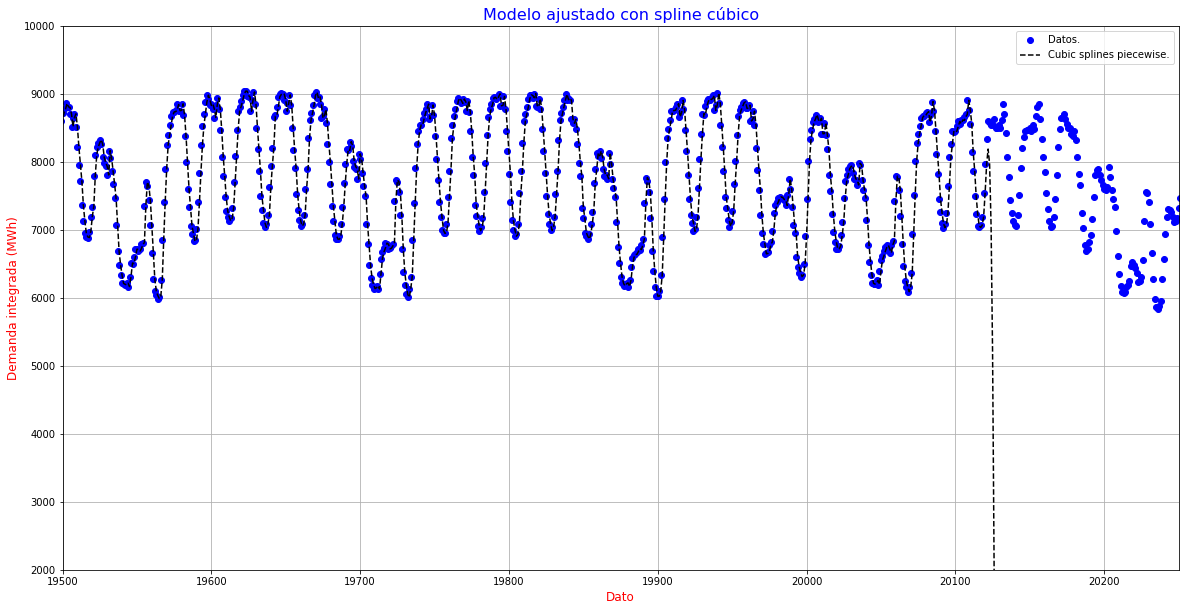

In [96]:
print("Extrapolando con splines al 100% de los datos: \n")
fig = plt.figure(figsize=(20,10))
plt.xlim(19500, 20250)
plt.ylim(2000, 10000)
plt.plot(data_2.index, data_2.dema_int, "bo", data_2.index, y_eval_spline_80_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Usando splines con promedios semanales (100% de los datos):

In [55]:
#Generando un dataframe con los promedios semanales:
prom_sem = [7193.166960541667,
 7248.862151440476,
 7331.153581321428,
 7368.65838170238,
 7169.082587488096,
 7331.714745238096,
 7482.9630442083335,
 7616.737792059524,
 7431.334553517858,
 7593.32658827381,
 7556.521984488094,
 7268.933052619047,
 7337.91220902381,
 7440.170972142857,
 7140.116526773809,
 7413.941581541666,
 6539.3820072976205,
 6550.370594440476,
 7413.5308106785715,
 7401.275319869047,
 7429.139407190477,
 7301.5526203750005,
 7190.300327196428,
 7213.042748505953,
 7609.114174238096,
 7817.782800696428,
 8019.149876482143,
 8093.100807672619,
 7947.070357208334,
 8063.0458459880965,
 7547.0522556845235,
 8186.744827011905,
 8167.383612345237,
 8440.261563178572,
 8115.990275011906,
 8062.677836351191,
 8178.600963005952,
 8476.134066755953,
 8909.141679017857,
 8947.921018113095,
 8312.816144863096,
 7696.614855089288,
 7589.655276708333,
 7499.96991792262,
 7602.322980880954,
 7710.36235335119,
 8206.044534458333,
 8195.104091000001,
 8149.365474339285,
 7783.062603738095,
 7950.33793689881,
 7932.696022065477,
 7790.477210767856,
 7661.542113309524,
 7382.688079160713,
 7558.930754809525,
 7478.252254791666,
 7678.583154208333,
 7596.379113529763,
 7453.5137827976205,
 7420.359167708334,
 7267.310636184525,
 7446.604925851191,
 7148.215668119048,
 7550.789678208334,
 7231.014473464287,
 7381.42572002976,
 7437.511726428571,
 6488.725000589286,
 6446.004482648809,
 7551.499959619046,
 7583.331814613094,
 7558.748498940476,
 7522.6331781011895,
 7456.47233092262,
 7867.368319708335,
 7970.645926375,
 8040.41864222619,
 8189.049325726191,
 8320.095403619047,
 7924.367549958333,
 8274.872974934524,
 8272.407417511906,
 8311.24906754762,
 7899.729421946428,
 7733.703677660714,
 8250.437164654762,
 8463.588675880954,
 8453.821887988097,
 8735.981564267855,
 8777.175237279762,
 8430.672419553572,
 8419.009096696429,
 8464.105880095238,
 8356.895205505953,
 8178.575219869047,
 8252.400725988095,
 8072.004479761905,
 7868.336338839284,
 8016.437208505951,
 8257.269630744047,
 8187.882181416667,
 8367.596797130955,
 7908.008033035714,
 8009.070136934525,
 7959.480421375,
 7619.935788690476,
 7924.401004321429,
 7686.114920238096,
 7827.579433380954,
 7943.894657261905,
 7616.06907172619,
 7520.413125303571,
 7665.28475510119,
 7799.769635375001,
 7389.2888105119055,
 7853.069151916667,
 7855.5966347023805,
 7709.2455980357145,
 7729.280682803571,
 6715.628269672618,
 6412.592887184524,
 7467.017612154763,
 7815.148776982142,
 7856.54204210119,
 7767.998425208333,
 7421.902177494048,
 7730.024130982142,
 8090.744672065477,
 8234.659008357145,
 8211.01438169643,
 8304.604116482142,
 8136.518385255954,
 8306.359873773808,
 7974.234591910713,
 7306.012978386904,
 6880.019552547618,
 7194.492867232142,
 7107.165434726191,
 6851.279484940475,
 6920.636410386905,
 7369.649709845237,
 7710.0343625000005,
 7981.166451255953,
 8170.70843970238,
 8153.383904208333,
 7986.661686613094,
 7670.2396034226185,
 7793.2501059999995,
 7597.501642083333]

In [56]:
len(prom_sem)

150

In [57]:
prom_a_sem = np.array(prom_sem)
x_sem = np.array(list(range(1,len(prom_sem)+1)))
print(x_sem)

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


In [58]:
data_sem = pd.DataFrame(prom_sem, columns = ['Promedio'])

In [59]:
sem = pd.DataFrame(x_sem, columns = ['Semana']) 
data_sem['Semana'] = sem['Semana']

El dataFrame final con los promedios semanales se ve así:

In [60]:
data_sem

,Promedio,Semana
0,7193.166961,1
1,7248.862151,2
2,7331.153581,3
3,7368.658382,4
4,7169.082587,5
...,...,...
145,8153.383904,146
146,7986.661687,147
147,7670.239603,148
148,7793.250106,149


In [61]:
mpoints_sem = 150
x_sem = np.linspace(0, 149, mpoints_sem)

In [62]:
#Haciendo splines cúbicos, 100% promedios semanales:
spline_sem = interp1d(x_sem, data_sem.Promedio, kind = 'cubic', fill_value='extrapolate')

In [63]:
y_eval_spline_sem = spline_sem(x_sem)
print('x_sem.shape para verificar:', x_sem.shape[0])
print('y_eval_spline_sem.shape para verificar:', y_eval_spline_sem.shape[0])

x_sem.shape para verificar: 150
y_eval_spline_sem.shape para verificar: 150


Gráfica con splines 100% promedios semanales: 



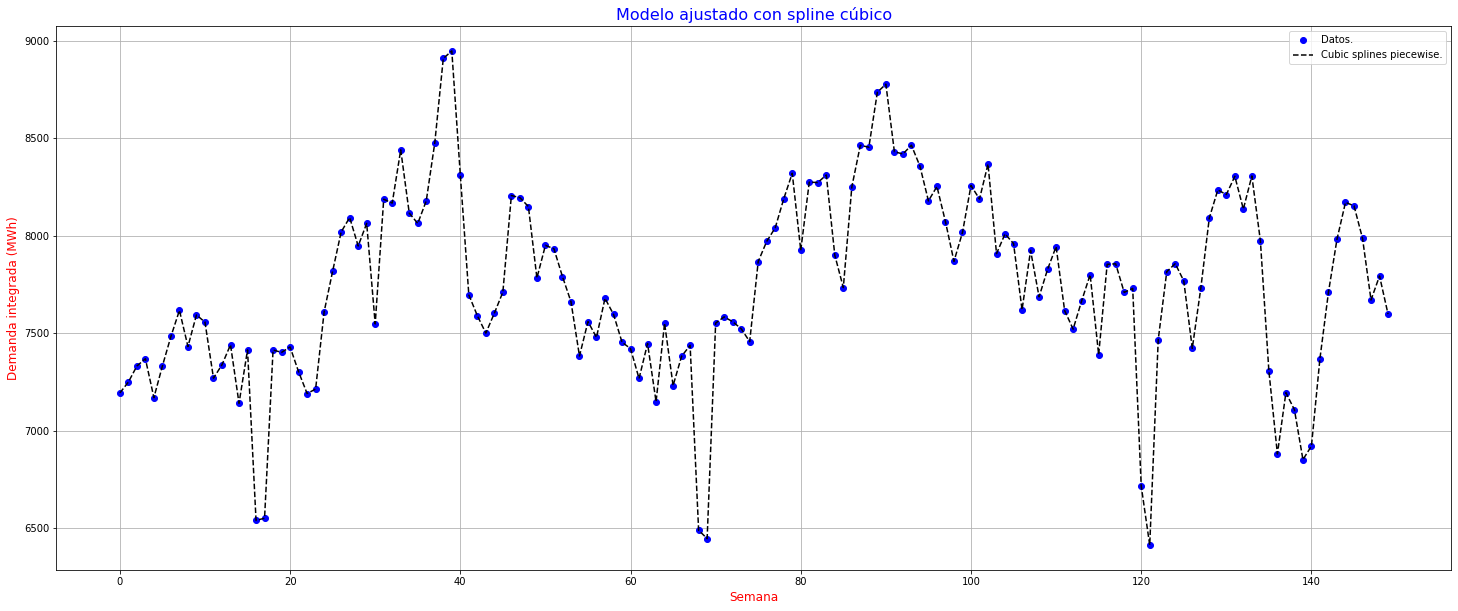

In [64]:
print("Gráfica con splines 100% promedios semanales: \n")
fig = plt.figure(figsize=(25,10))
plt.plot(data_sem.index, data_sem.Promedio, "bo", x_sem, y_eval_spline_sem, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Semana', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Usando splines con promedios semanales (80% de los datos):

In [65]:
#Creando arreglo para eliminar el 20% final de los datos semanales:
del_rows_sem_80p = range(120,150)
print(del_rows_sem_80p)

range(120, 150)


In [66]:
#Trabajando con el 80% de los valores valores:
data_sem_80p = data_sem.drop(data_sem.index[del_rows_sem_80p], axis = 0)

In [67]:
data_sem_80p

,Promedio,Semana
0,7193.166961,1
1,7248.862151,2
2,7331.153581,3
3,7368.658382,4
4,7169.082587,5
...,...,...
115,7389.288811,116
116,7853.069152,117
117,7855.596635,118
118,7709.245598,119


In [68]:
mpoints_sem_80p = 120
x_sem_80p = np.linspace(0, 119, mpoints_sem_80p)

In [69]:
#Haciendo splines cúbicos, 80% promedios semanales:
spline_sem_80p = interp1d(x_sem_80p, data_sem_80p.Promedio, kind = 'cubic', fill_value='extrapolate')

In [70]:
y_eval_spline_sem_80p = spline_sem_80p(x_sem_80p)
print('x_sem.shape para verificar:', x_sem_80p.shape[0])
print('y_eval_spline_sem.shape para verificar:', y_eval_spline_sem_80p.shape[0])

x_sem.shape para verificar: 120
y_eval_spline_sem.shape para verificar: 120


Gráfica con splines 80% promedios semanales: 



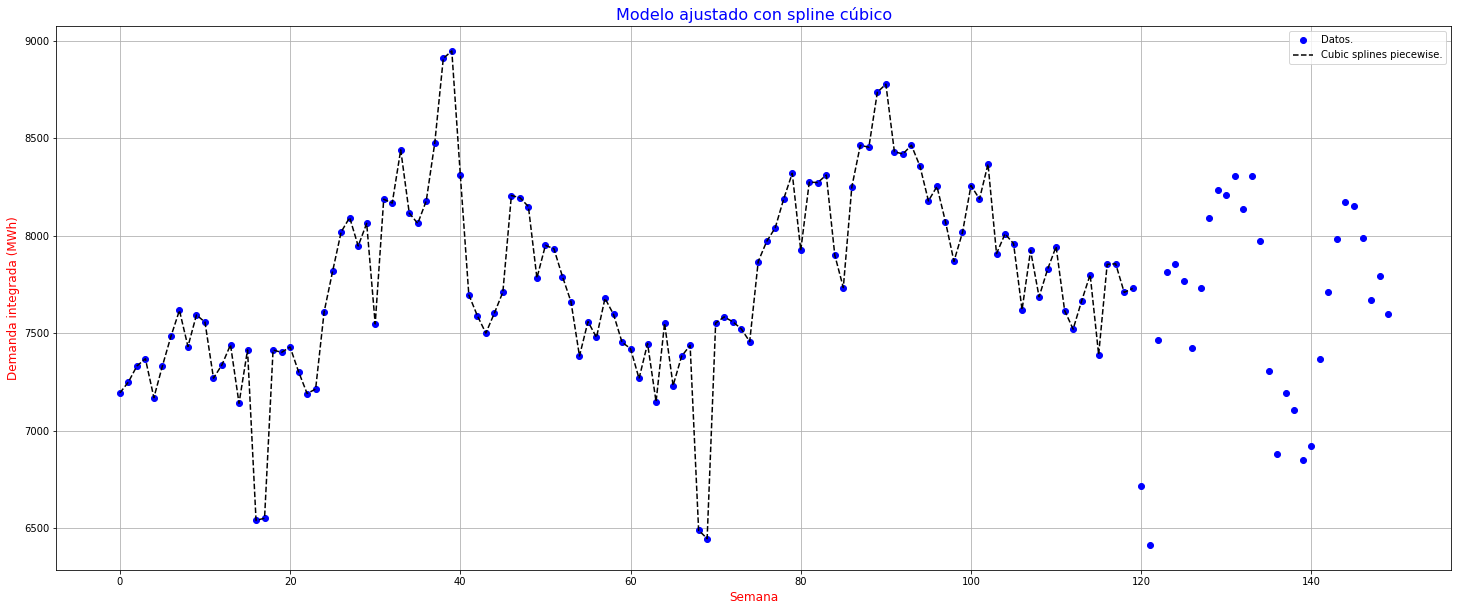

In [71]:
print("Gráfica con splines 80% promedios semanales: \n")
fig = plt.figure(figsize=(25,10))
plt.plot(data_sem.index, data_sem.Promedio, "bo", x_sem_80p, y_eval_spline_sem_80p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Semana', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Extrapolando con splines al 100% de los datos semanales:

In [72]:
y_eval_spline_sem_80_100p = spline_sem_80p(data_sem.index)
print('x_80%.shape para verificar:', data_sem.index)
print('y_eval_spline_80%.shape para verificar:', y_eval_spline_sem_80_100p.shape[0])

x_80%.shape para verificar: RangeIndex(start=0, stop=150, step=1)
y_eval_spline_80%.shape para verificar: 150


Extrapolando con splines al 100% de los datos semanales: 



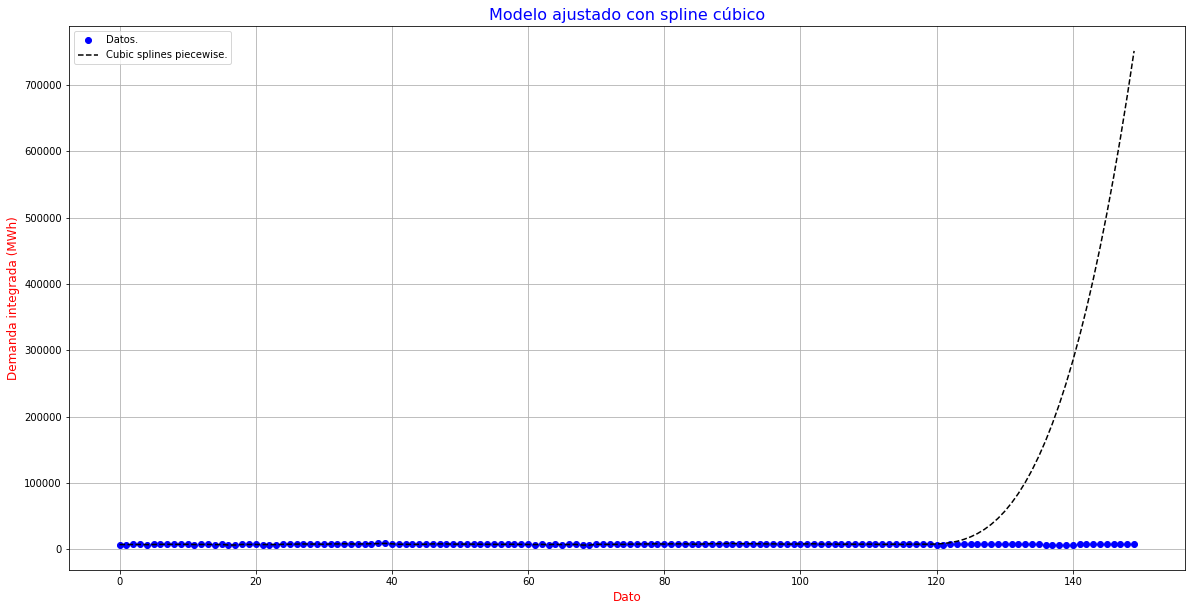

In [73]:
print("Extrapolando con splines al 100% de los datos semanales: \n")
fig = plt.figure(figsize=(20,10))
plt.plot(data_sem.index, data_sem.Promedio, "bo", data_sem.index, y_eval_spline_sem_80_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Haciendo zoom al final:

Extrapolando con splines al 100% de los datos semanales: 



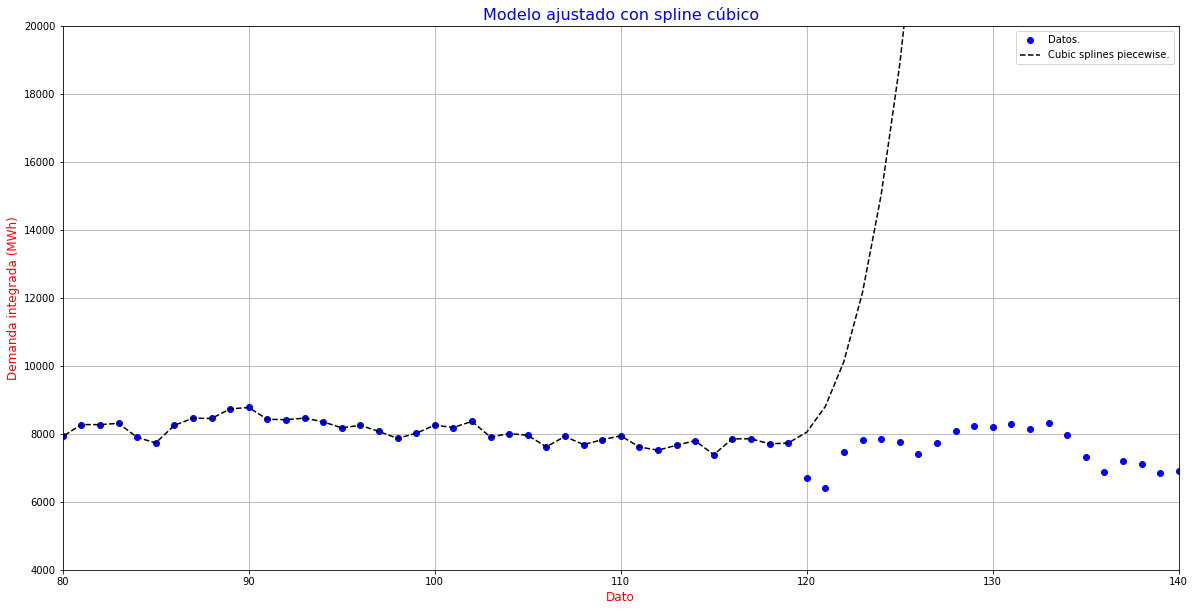

In [74]:
print("Extrapolando con splines al 100% de los datos semanales: \n")
fig = plt.figure(figsize=(20,10))
plt.xlim(80, 140)
plt.ylim(4000, 20000)
plt.plot(data_sem.index, data_sem.Promedio, "bo", data_sem.index, y_eval_spline_sem_80_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Usando splines con promedios mensuales (100% de los datos):

In [75]:
prom_mes = [7285.460268751487,
 7400.124542248513,
 7462.5290447247025,
 7333.035322370535,
 6976.139683071429,
 7283.508775816964,
 7884.786914772321,
 7935.978321473215,
 8196.578321721727,
 8627.949431723213,
 7774.764048645834,
 7928.458489922619,
 7953.865509260417,
 7598.409539511904,
 7551.6820763318465,
 7320.622599465774,
 7400.185399532738,
 7017.390314367559,
 7601.3055819181545,
 8130.052324486607,
 8195.724252488097,
 8086.864735035714,
 8599.412777272322,
 8354.646350541667,
 8052.294688273809,
 8180.1891605818455,
 7878.221837830358,
 7768.414520651786,
 7593.689081572917,
 7786.798016864584,
 7102.5968864985125,
 7694.116693946429,
 8210.2555446503,
 7930.781457331846,
 7008.239334861606,
 7495.371733497024,
 7995.248408486606,
 7695.375874041666]

In [76]:
prom_a_mes = np.array(prom_mes)
x_mes = np.array(list(range(1,39)))

In [77]:
data_mes = pd.DataFrame(prom_mes, columns = ['Promedio'])

In [78]:
mes = pd.DataFrame(x_mes, columns = ['Mes']) 
data_mes['Mes'] = mes['Mes']

In [79]:
data_mes

,Promedio,Mes
0,7285.460269,1
1,7400.124542,2
2,7462.529045,3
3,7333.035322,4
4,6976.139683,5
5,7283.508776,6
6,7884.786915,7
7,7935.978321,8
8,8196.578322,9
9,8627.949432,10


In [80]:
mpoints_mes = 38
x_mes = np.linspace(0, 37, mpoints_mes)

In [81]:
#Haciendo splines cúbicos, 100% promedios mensuales:
spline_mes = interp1d(x_mes, data_mes.Promedio, kind = 'cubic', fill_value='extrapolate')

In [82]:
y_eval_spline_mes = spline_mes(x_mes)
print('x_mes.shape para verificar:', x_mes.shape[0])
print('y_eval_spline_mes.shape para verificar:', y_eval_spline_mes.shape[0])

x_mes.shape para verificar: 38
y_eval_spline_mes.shape para verificar: 38


Gráfica con splines 100% promedios mensuales: 



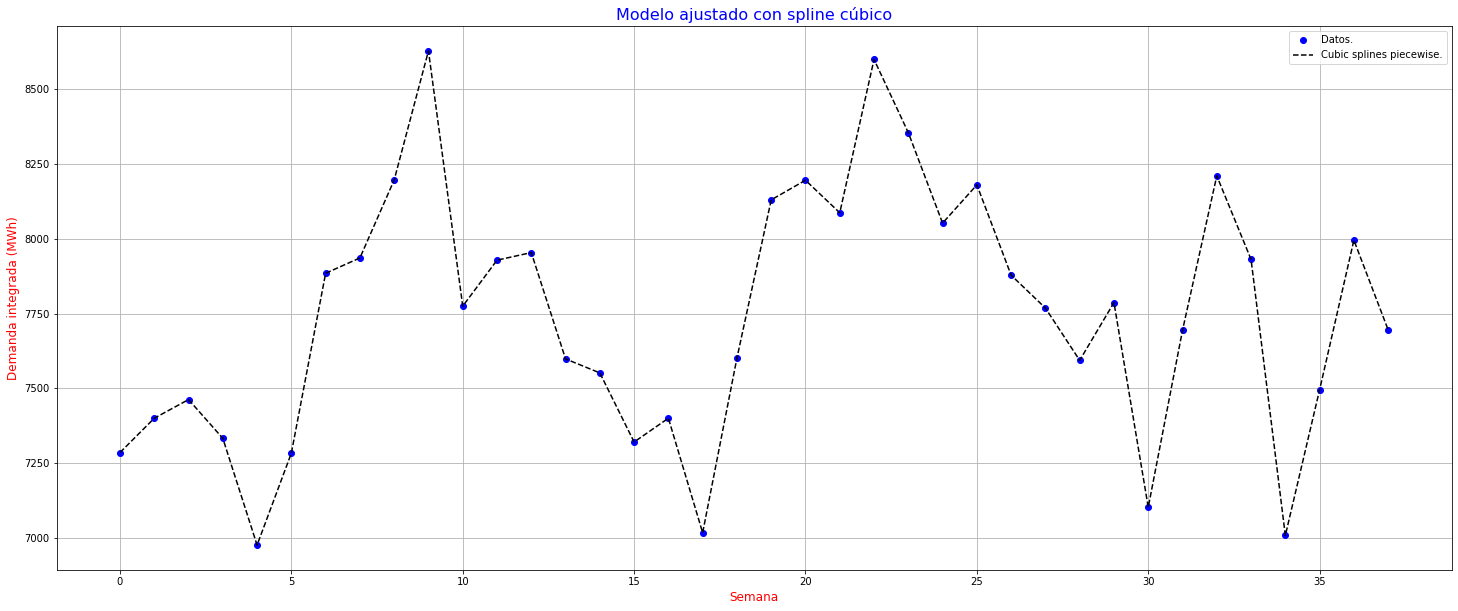

In [83]:
print("Gráfica con splines 100% promedios mensuales: \n")
fig = plt.figure(figsize=(25,10))
plt.plot(data_mes.index, data_mes.Promedio, "bo", x_mes, y_eval_spline_mes, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Semana', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Usando splines con promedios mensuales (80% de los datos):

In [84]:
#Creando arreglo para eliminar el 20% final de los datos mensuales:
del_rows_mes_80p = range(30,38)
print(del_rows_mes_80p)

range(30, 38)


In [85]:
#Trabajando con el 80% de los valores valores:
data_mes_80p = data_mes.drop(data_mes.index[del_rows_mes_80p], axis = 0)

In [86]:
data_mes_80p

,Promedio,Mes
0,7285.460269,1
1,7400.124542,2
2,7462.529045,3
3,7333.035322,4
4,6976.139683,5
5,7283.508776,6
6,7884.786915,7
7,7935.978321,8
8,8196.578322,9
9,8627.949432,10


In [87]:
mpoints_mes_80p = 30
x_mes_80p = np.linspace(0, 29, mpoints_mes_80p)

In [88]:
#Haciendo splines cúbicos, 80% promedios mensuales:
spline_mes_80p = interp1d(x_mes_80p, data_mes_80p.Promedio, kind = 'cubic', fill_value='extrapolate')

In [89]:
y_eval_spline_mes_80p = spline_mes_80p(x_mes_80p)
print('x_mes.shape para verificar:', x_mes_80p.shape[0])
print('y_eval_spline_mes.shape para verificar:', y_eval_spline_mes_80p.shape[0])

x_mes.shape para verificar: 30
y_eval_spline_mes.shape para verificar: 30


Gráfica con splines 80% promedios mensuales: 



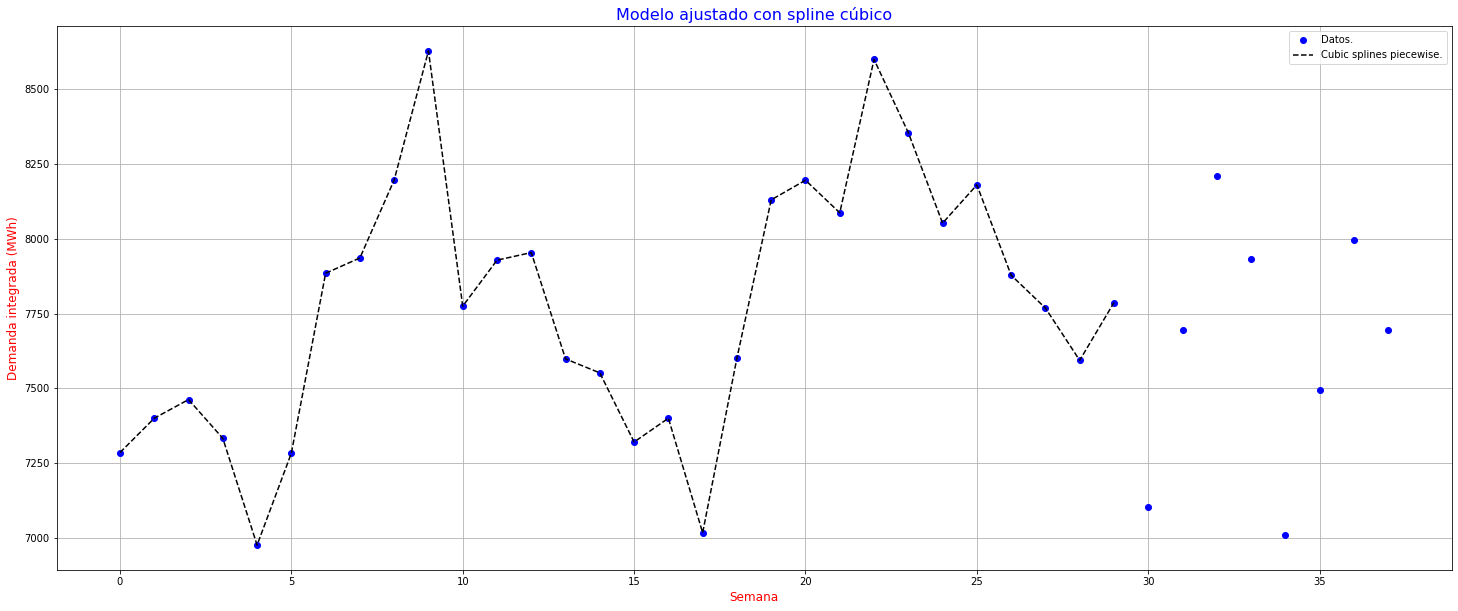

In [90]:
print("Gráfica con splines 80% promedios mensuales: \n")
fig = plt.figure(figsize=(25,10))
plt.plot(data_mes.index, data_mes.Promedio, "bo", x_mes_80p, y_eval_spline_mes_80p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Semana', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

### Extrapolando con splines al 100% de los datos mensuales:

In [91]:
y_eval_spline_mes_80_100p = spline_mes_80p(data_mes.index)
print('x_mes_80%.shape para verificar:', data_mes.index)
print('y_eval_spline_mes_80%.shape para verificar:', y_eval_spline_mes_80_100p.shape[0])

x_mes_80%.shape para verificar: RangeIndex(start=0, stop=38, step=1)
y_eval_spline_mes_80%.shape para verificar: 38


Extrapolando con splines al 100% de los datos mensuales: 



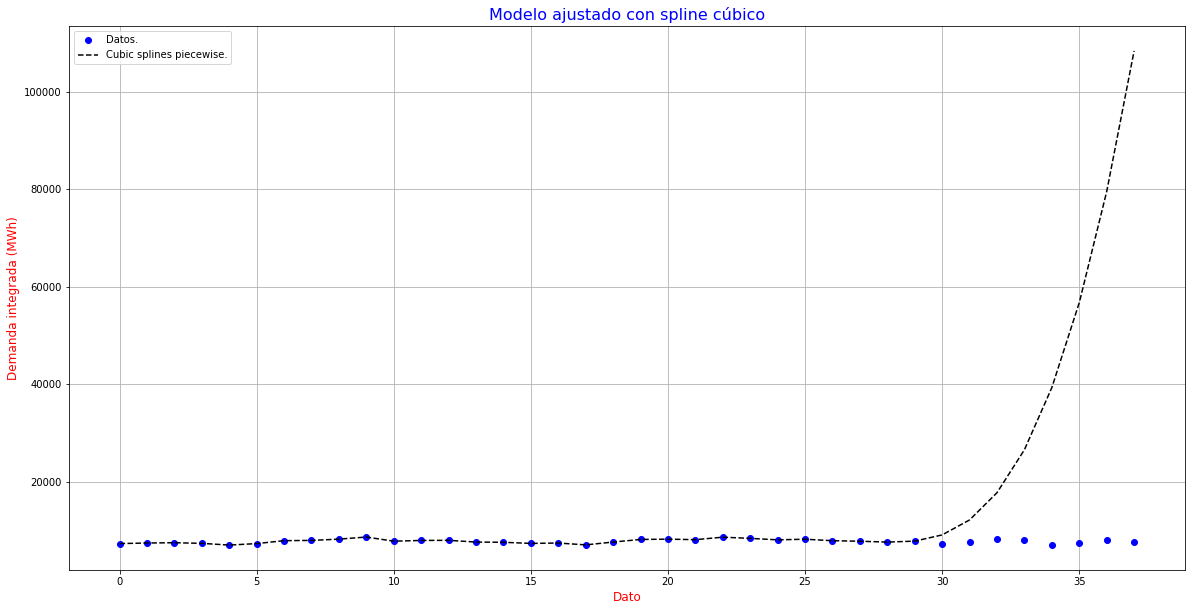

In [92]:
print("Extrapolando con splines al 100% de los datos mensuales: \n")
fig = plt.figure(figsize=(20,10))
plt.plot(data_mes.index, data_mes.Promedio, "bo", data_mes.index, y_eval_spline_mes_80_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()

## Haciendo zoom al final:

Extrapolando con splines al 100% de los datos mensuales: 



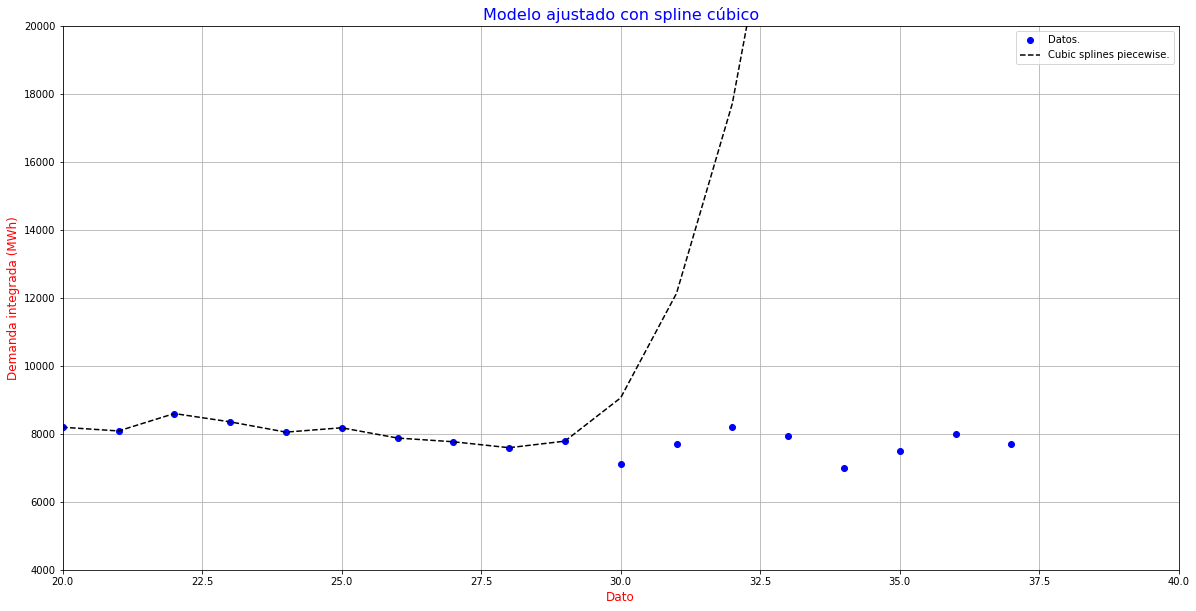

In [93]:
print("Extrapolando con splines al 100% de los datos mensuales: \n")
fig = plt.figure(figsize=(20,10))
plt.xlim(20, 40)
plt.ylim(4000, 20000)
plt.plot(data_mes.index, data_mes.Promedio, "bo", data_mes.index, y_eval_spline_mes_80_100p, "k--")
plt.legend(['Datos.','Cubic splines piecewise.'], loc='best')
plt.title("Modelo ajustado con spline cúbico", fontsize = 16, color ='b')
plt.xlabel('Dato', fontsize = 12, color = "red")
plt.ylabel('Demanda integrada (MWh)', fontsize= 12, color = "red")
plt.grid(True)
plt.show()